## 딥러닝 한번에 끝내기
### 8. 가중치 초기화와 배치 정규화

### 8-1. 들어가며

![](./img08/01.png)

![](./img08/02.png)

#### 과정 개요

가중치 초기화(Weights Initialization)
어떤 목적으로 가중치 초기화를 진행하는지 이해하고 각 방법별 효과에 대해서 실습을 통해 확인합니다.

Reuters 딥러닝 모델 예제 로이터 기사 데이터를 분류하는 모델을 베이스라인으로 삼아서 오늘 배운 내용을 적용해봅니다.

배치 정규화(Batch Normalization) 배치 정규화는 어떤 것이고 어떤 효과가 있는지 실습을 통해 알아봅니다.

#### 학습 목표

딥러닝 모델의 효과적인 학습을 위한 가중치 초기화에 대해 학습합니다.

Reuters 데이터셋을 이용해 다중 분류를 위한 딥러닝 모델에 대해 학습합니다.

딥러닝 모델의 빠른 학습과 과대적합을 해결하는 배치 정규화 기술에 대해 학습합니다.

### 8-2. 가중치 초기화(Weights Initialization)

![](./img08/03.png)

![](./img08/04.png)

가중치가 0인 방법은 가중치가 0이기 때문에 모든 뉴런이 같은 값을 가지게 되어서 뉴런을 여러개 둔 의미가 없어집니다.

최악의 방법

![](./img08/05.png)

여전히 한곳으로 치우쳐 신경망 표현을 제한

![](./img08/06.png)

![](./img08/07.png)

![](./img08/08.png)

![](./img08/09.png)

![](./img08/10.png)

Relu 사용시 대부분 값이 0으로 나옴

![](./img08/11.png)

![](./img08/12.png)

![](./img08/13.png)

![](./img08/14.png)

![](./img08/15.png)

![](./img08/16.png)

가중치 초기화는 신경망의 성능에 큰 영향을 주는 요소 중 하나입니다. 만약 가중치의 값이 일부 값으로 치우치게 되면, 활성화 함수를 통과한 값들도 치우치게 되고, 결국 표현할 수 있는 신경망의 수가 적어지는 문제가 발생합니다. 보통 가중치 초기값으로 0에 가까운 무작위 값을 사용하더라도 초기값에 따라서 모델의 성능 차이가 발생할 수 있습니다. 즉, 모델의 활성화 값이 골고루 분포 되는 것이 중요합니다.

가중치 초기화 방법에 따라서 어떻게 달라지는지 살펴보기 위해 지정된 활성화 함수 activation과 초기화 initializer에 따라 모델을 생성하는 build_model 함수를 정의합니다.

In [12]:
from tensorflow.keras import models, layers, optimizers

def build_model(activation, initializer):
  model = models.Sequential()
  model.add(layers.Input(shape=(400, 20), name='input'))
  model.add(layers.Dense(20, activation=activation, name='hidden1',
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden2',
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden3',
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden4',
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden5',
                        kernel_initializer=initializer))
  model.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizers.SGD(),
                metrics=['accuracy'])
  return model

각 레이어마다 분포값을 히스토그램으로 출력하기 위한 show_layer 함수를 정의합니다.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

def show_layer(model):
  input = np.random.randn(400, 20)

  plt.figure(figsize=(12, 6))
  for i in range(1, 6):
    name = 'hidden' + str(i)
    layer = model.get_layer(name)
    input = layer(input)
    plt.subplot(1, 6, i)
    plt.title(name)
    plt.hist(input, 20, range=(-1, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
  plt.show()

/var/folders/vt/cvvn63n12qv1p9cwprw78jwc0000gq/T/ipykernel_50650/1486633323.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


여러 활성화 함수들이 있지만, 크게 선형 함수와 비선형 함수로 구분하여 가중치 초기화 방법에 따라 어떻게 분포가 달라지는지 살펴보도록 하겠습니다.

추가 안내: 영상에서의 히스토그램 범위는 (0, 1)이고, LMS에서의 히스토그램 범위는 (-1, 1)입니다. 따라서 영상의 결과/설명이 LMS 내의 결과/설명과 다를 수 있습니다. 히스토그램 범위를 변경한 이유는 비선형 함수인 reLU도 (0, 1)에서 선형이기 때문입니다.

#### 선형 함수 가중치 초기화

활성화 함수 중에서 activations.sigmoid를 사용하여 초기화 방법들을 비교해봅니다. sigmoid 함수는 전체적으로는 볼 때 비선형 함수이지만 특정 범위(-1, 1)에서는 선형 함수입니다.

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/SiGeuMoIDeuHamSu.png)

[시그모이드 함수]
https://ko.wikipedia.org/wiki/%EC%8B%9C%EA%B7%B8%EB%AA%A8%EC%9D%B4%EB%93%9C_%ED%95%A8%EC%88%98#/media/%ED%8C%8C%EC%9D%BC:Logistic-curve.svg

🪄 참고: 각 초기화 코드가 실행되려면 1-2분의 시간이 소요됩니다.

#### 제로 초기화

initializers.Zeros()를 이용해 가중치를 제로값으로 초기화해 봅시다.

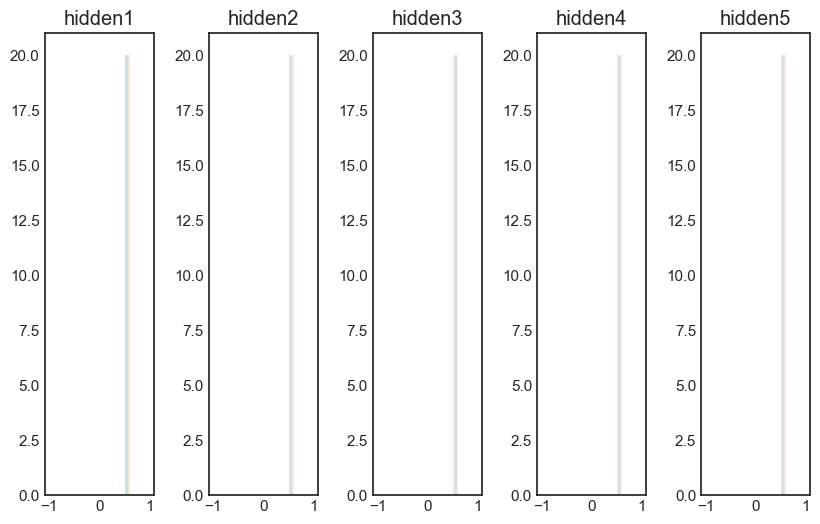

In [15]:
from tensorflow.keras import initializers, activations

model = build_model(activations.sigmoid, initializers.Zeros())
show_layer(model)

가중치를 제로값으로 초기화할 경우 각 레이어의 가중치 값 분포가 특정한 값으로만 몰려 있는 것을 알 수 있습니다. 가중치 값이 0일 경우에는 오차역전파에서 모든 가중치 값이 똑같이 갱신되어 학습이 올바르게 진행될 수 없습니다.

참고: 각 레이어의 값이 0.5에 몰려 있는 이유는 가중치 값이 활성화 함수로 사용한 sigmoid 함수를 통과하였기 때문입니다. (sigmoid(0)=0.5)

#### 정규분포 초기화

initializers.RandomNormal()를 통해 정규분포를 따르도록 무작위 값을 초기화해 봅시다.

/Users/ralphpark/anaconda3/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


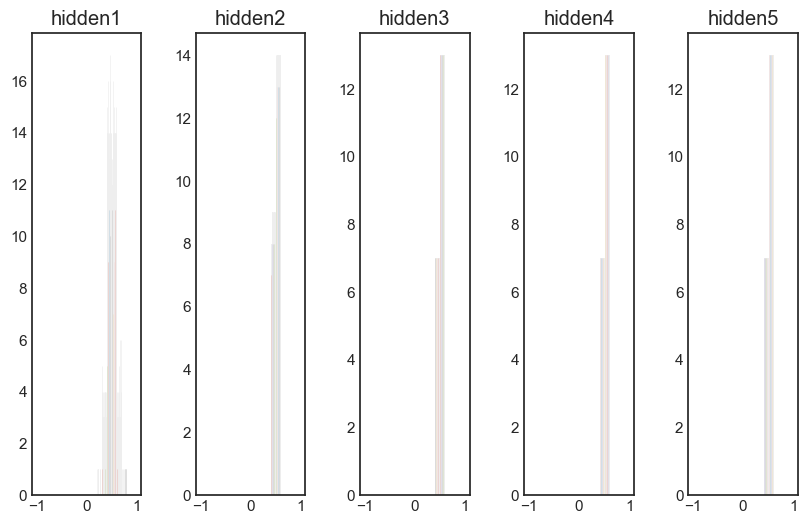

In [16]:
model = build_model(activations.sigmoid, initializers.RandomNormal())
show_layer(model)

정규분포를 따르도록 무작위 값을 초기화하면 제로 초기화보다는 분포가 퍼져있는 것을 알 수 있습니다. 그러나 한 곳에 치우쳐 있기 때문에 여전히 신경망의 표현을 제한한다는 문제가 있습니다.

#### 균일분포 초기화

initializers.RandomUniform()를 통해 균일분포를 따르는 무작위 값으로 초기화헤 봅시다.

/Users/ralphpark/anaconda3/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


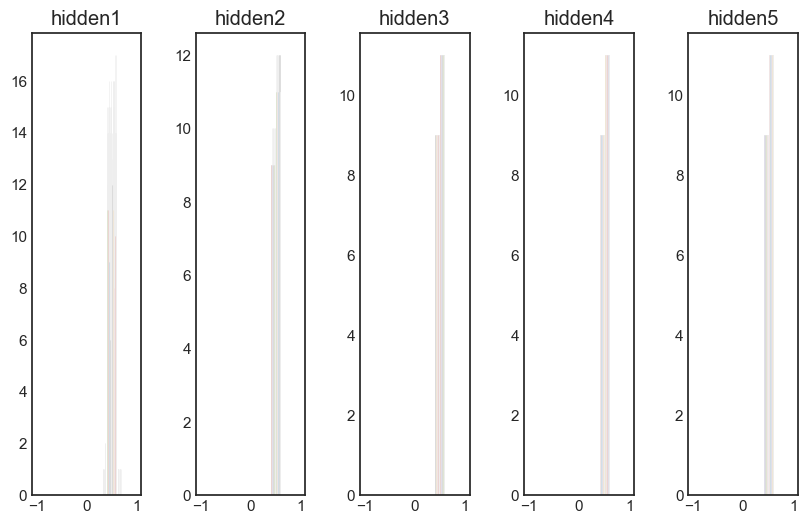

In [17]:
model = build_model(activations.sigmoid, initializers.RandomUniform())
show_layer(model)

균일분포를 따르는 무작위 값으로 초기화한 결과도 제로 초기화보다는 분포가 퍼져있는 것을 알 수 있습니다. 그러나 활성화 값이 균일하지 않으므로 역전파로 전해지는 기울기 값이 사라질 수 있습니다.

#### Xavier(Glorot) 정규분포 초기화

Xavier(Glorot) 방법은 은닉층의 노드의 수가 n이라면 표준편차가 $\frac{1}{\sqrt{n}}$인 분포로 초기화 를 수행합니다. initializers.GlorotNormal()를 적용한 모델을 시각화해 봅시다.

/Users/ralphpark/anaconda3/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


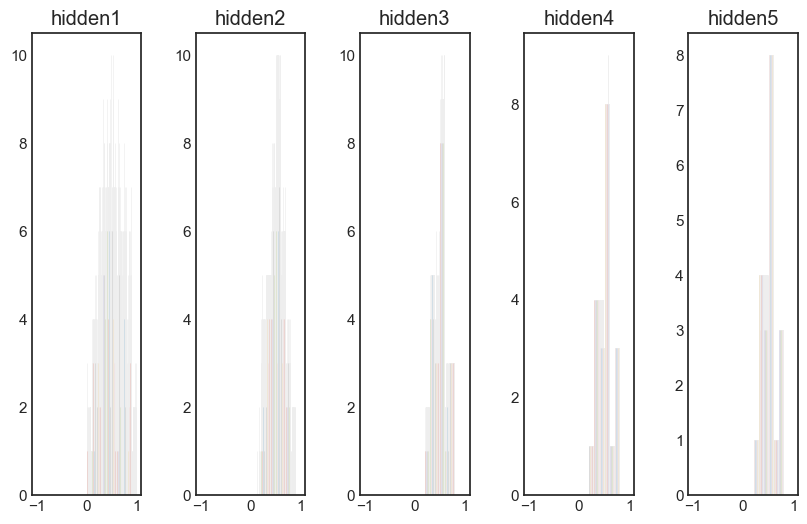

In [18]:
model = build_model(activations.sigmoid, initializers.GlorotNormal())
show_layer(model)

initializers.GlorotNormal()를 적용한 모델을 시각화한 결과를 보면 비교적 분포로 고르고 레이어마다 표현이 잘 되고 있는 것을 알 수 있습니다. 즉, 더 많은 가중치에 역전파가 전달이 가능하게 됩니다. 일반적으로 Xavier(Glorot) 방법은 활성화 함수가 선형함수인 경우에 매우 적합 합니다.

#### Xavier(Glorot) 균일분포 초기화

initializers.GlorotUniform()를 통해 Xavier(Glorot) 균일분포 초기화를 이용한 결과도 마찬가지로 잘 분포되어 있습니다.

/Users/ralphpark/anaconda3/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


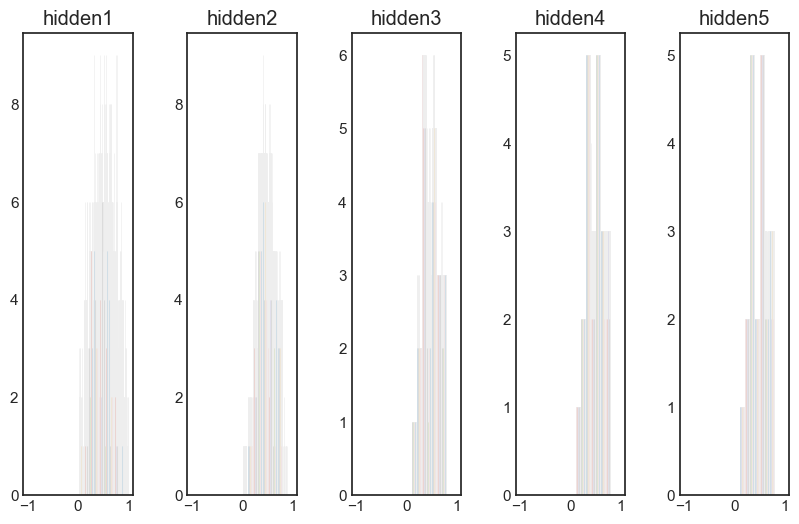

In [19]:
model = build_model(activations.sigmoid, initializers.GlorotUniform())
show_layer(model)

활성화 함수를 sigmoid 대신 tanh를 적용한 결과, 좀 더 균일한 분포의 모습을 보이는 것을 알 수 있습니다.

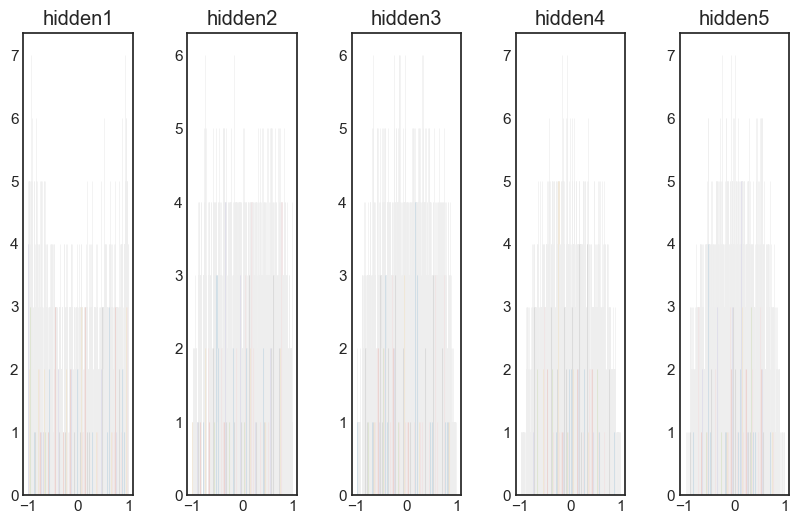

In [20]:
model = build_model(activations.tanh, initializers.GlorotUniform())
show_layer(model)

#### He 정규분포 초기화
He 초기화 방법은 표준편차가 $\sqrt{\frac{2}{n}}$인 분포를 가지도록 초기화합니다. 시각화한 결과를 살펴보면, 활성화값 분포가 균일하게 분포되어 있습니다. 참고로 ReLU와 같은 비선형함수 일 때 더 적합하다고 알려진 초기화 방법입니다.

/Users/ralphpark/anaconda3/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


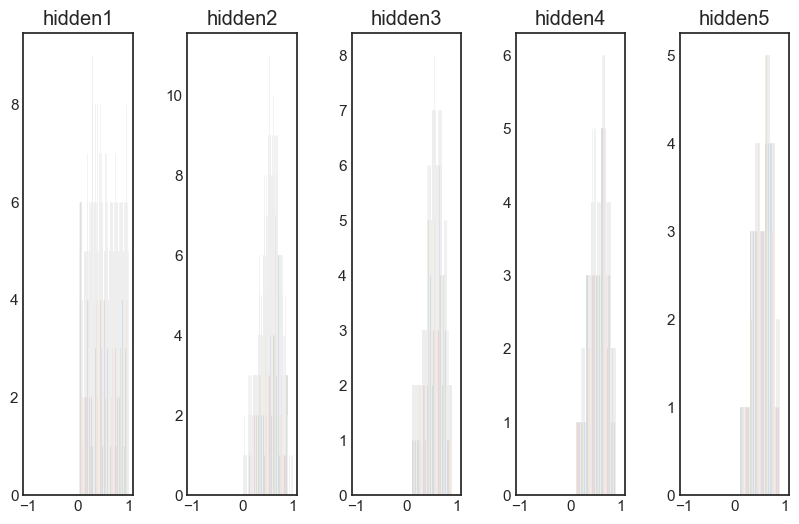

In [21]:
model = build_model(activations.sigmoid, initializers.HeNormal())
show_layer(model)

#### He 균일분포 초기화

He 균일분포도 정규분포와 유사하게 가중치 값들이 잘 분포되어 있음을 알 수 있습니다.

/Users/ralphpark/anaconda3/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


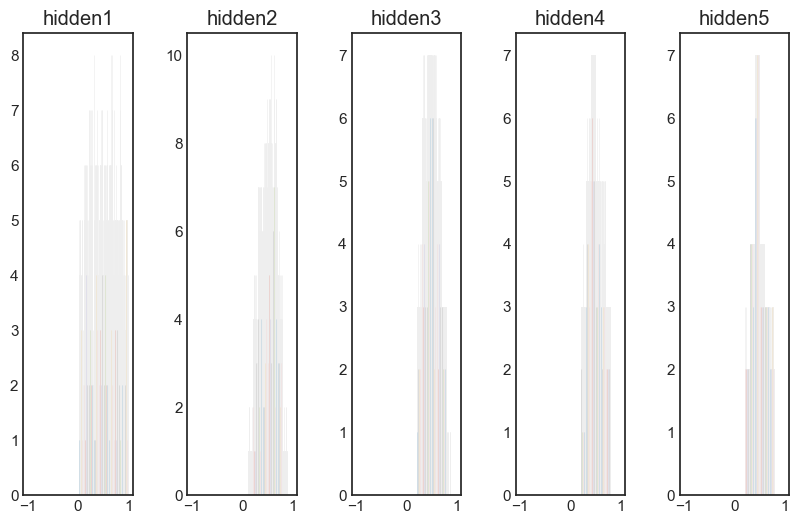

In [22]:
model = build_model(activations.sigmoid, initializers.HeUniform())
show_layer(model)

### 비선형 함수 가중치 초기화

대표적인 비선형 활성화 함수인 activations.relu를 사용하여 초기화 방법들을 비교해봅시다.

##### 제로 초기화

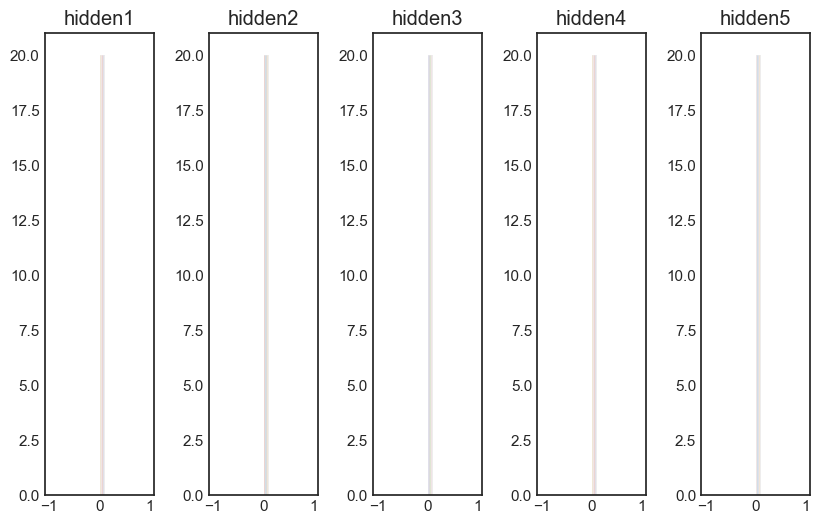

In [23]:
model = build_model(activations.relu, initializers.Zeros())
show_layer(model)

가중치를 제로값으로 초기화한 경우, 시각화 결과를 보면 레이어의 가중치 분포가 0에만 몰려 있는 것을 알 수 있습니다. 활성화 함수로 relu를 사용하였기 때문에 0인 값은 그대로 0에만 머무는 것을 알 수 있습니다.

##### 정규분포 초기화

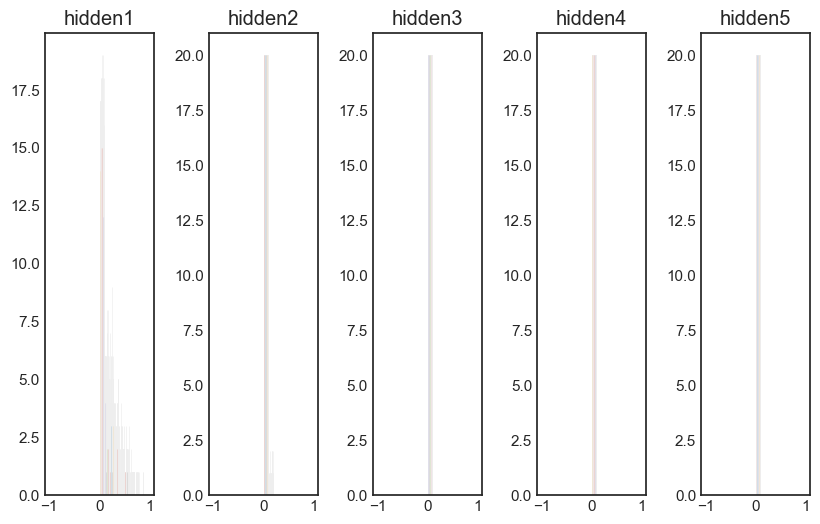

In [24]:
model = build_model(activations.relu, initializers.RandomNormal())
show_layer(model)

제로 초기화보다는 정규분포 초기화의 경우 분포가 퍼져있는 것을 알 수 있습니다. 그러나 마찬가지로 hidden1 레이어를 제외하고는 0에 치우쳐 있는 문제가 있습니다.

##### 균일분포 초기화

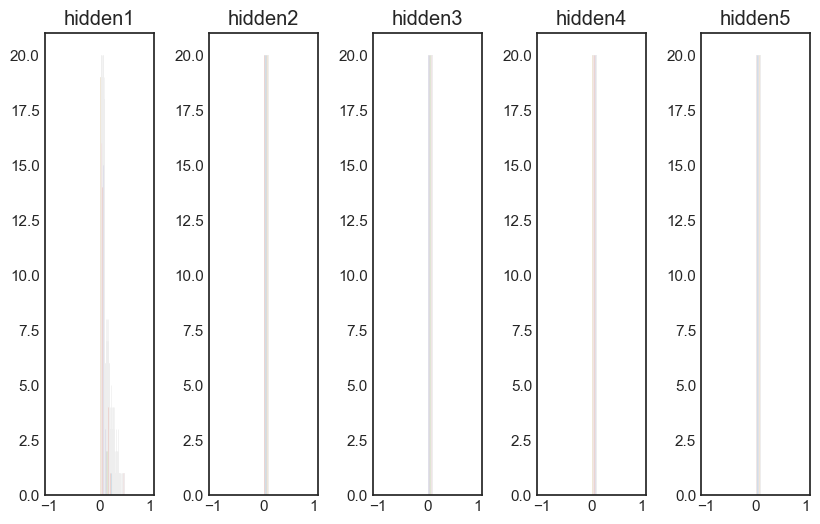

In [25]:
model = build_model(activations.relu, initializers.RandomUniform())
show_layer(model)

균일분포도 마찬가지로 처음 레이어를 제외하고는 가중치 값이 0에 치우쳐 있는 것을 알 수 있습니다.

##### Xavier(Glorot) 정규분포 초기화

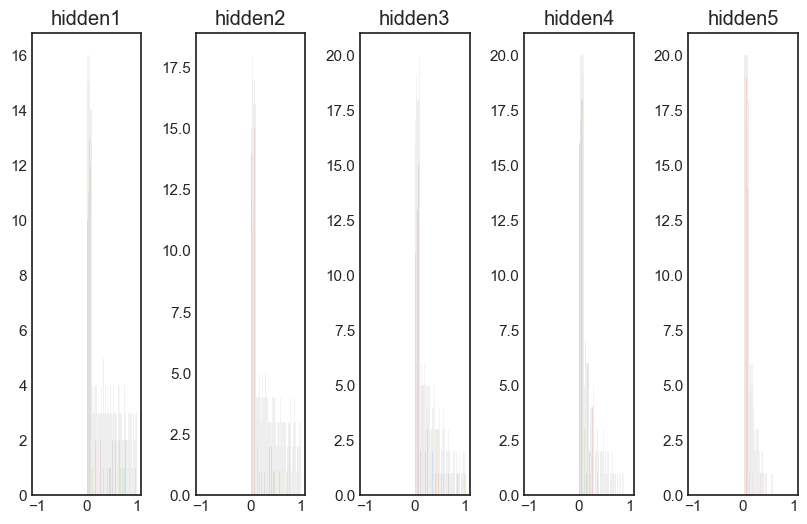

In [26]:
model = build_model(activations.relu, initializers.GlorotNormal())
show_layer(model)

Xavier 초기화 방법은 relu 특성상 0인 값이 많지만, 전체 레이어를 보더라도 어느정도 분포가 퍼져있는 것을 알 수 있습니다.

##### Xavier(Glorot) 균일분포 초기화

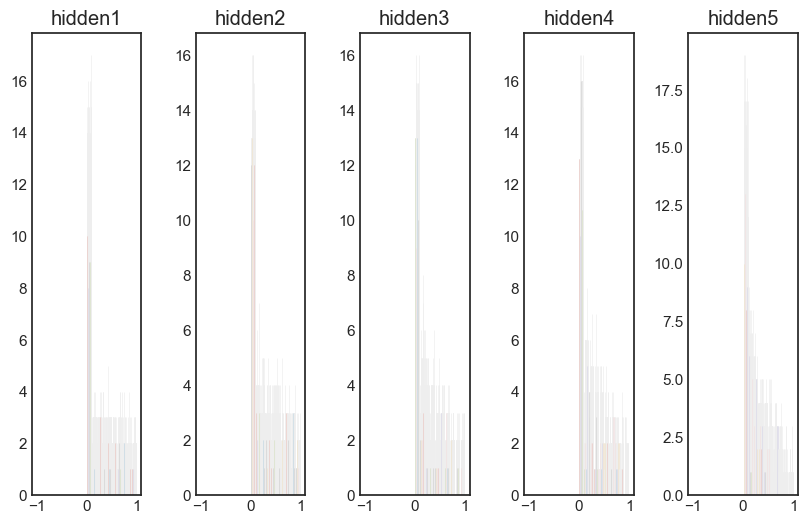

In [27]:
model = build_model(activations.relu, initializers.GlorotUniform())
show_layer(model)

균일분포도 정규분포와 유사한 형태의 분포를 보여주고 있습니다.

##### He 정규분포 초기화

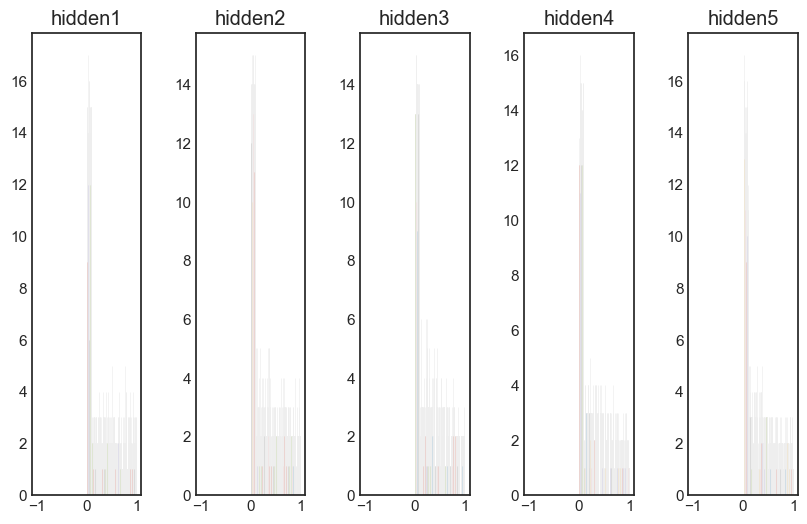

In [28]:
model = build_model(activations.relu, initializers.HeNormal())
show_layer(model)

He 초기화는 일반적으로 비선형 함수에 더 적합하다고 알려져있으며, 시각화된 결과도 어느정도 분포가 고르게 형성되어 있음을 알 수 있습니다.

##### He 균일분포 초기화

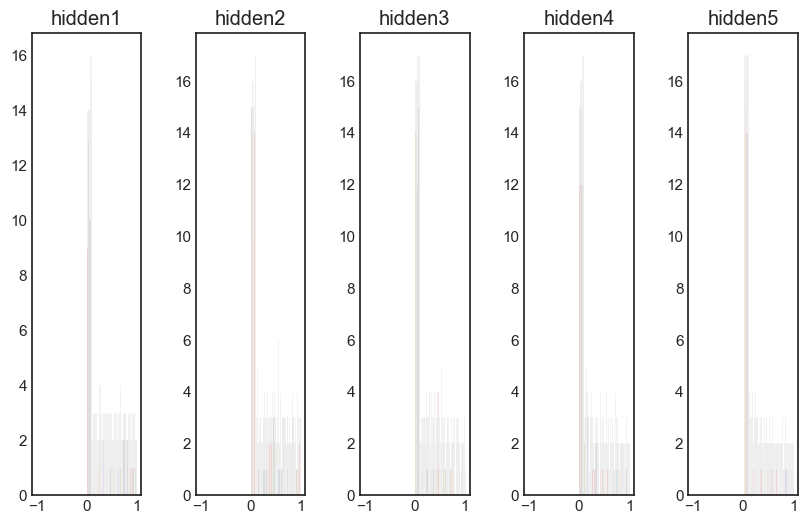

In [29]:
model = build_model(activations.relu, initializers.HeUniform())
show_layer(model)

균일분포도 마찬가지로 정규분포와 유사한 모습을 보여주고 있습니다.

##### 실습해보기

가중치 초기화에 대해선 잘 이해하셨나요?

그럼 코드를 통해 익숙해지는 시간을 가져볼까요?

아래 링크를 참조하여 다른 활성화 함수와 각종 초기화 방법을 적용했을 때는 어떤 결과가 나올지 아래 코드를 이용해 확인해보세요.

https://keras.io/ko/initializers/

https://keras.io/ko/activations/